# Create a Custom Dataset Class for Image Data

In [9]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torchvision import datasets, transforms
from PIL import Image
import os


In [10]:
class ImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_paths = []  # Store image file paths
        self.labels = []  # Store image labels

        # Load all image paths and their corresponding labels (class folder names)
        for label, class_dir in enumerate(os.listdir(image_dir)):  # Each folder is a class
            class_path = os.path.join(image_dir, class_dir)
            for img_name in os.listdir(class_path):
                self.image_paths.append(os.path.join(class_path, img_name))
                self.labels.append(label)

    def __len__(self):
        return len(self.image_paths)  # Returns the total number of images

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")  # Load image and convert to RGB
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


In [11]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

In [13]:
# Paths to the image datasets
train_image_dir = r'C:\Users\DELL\Documents\Sreevalli\ComputerVision\Classification\seg_train\seg_train'
val_image_dir = r'C:\Users\DELL\Documents\Sreevalli\ComputerVision\Classification\seg_test\seg_test'
test_image_dir = r'C:\Users\DELL\Documents\Sreevalli\ComputerVision\Classification\seg_test\seg_test'

# Create datasets
train_image_dataset = ImageDataset(image_dir=train_image_dir, transform=transform)
val_image_dataset = ImageDataset(image_dir=val_image_dir, transform=transform)
test_image_dataset = ImageDataset(image_dir=test_image_dir, transform=transform)

# Create DataLoaders
train_image_loader = DataLoader(dataset=train_image_dataset, batch_size=32, shuffle=True)
val_image_loader = DataLoader(dataset=val_image_dataset, batch_size=32, shuffle=False)
test_image_loader = DataLoader(dataset=test_image_dataset, batch_size=32, shuffle=False)



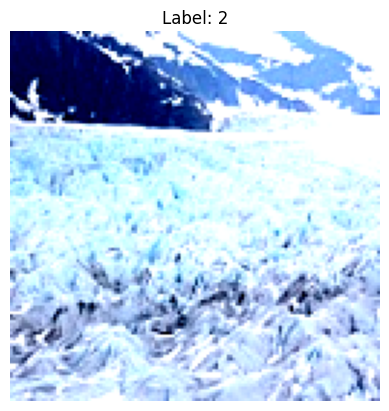

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a single batch
single_batch = iter(train_image_loader)
images, labels = next(single_batch)

# Visualize the first image in the batch
# Convert the PyTorch tensor to a NumPy array and transpose it to (H, W, C)
image = images[0].permute(1, 2, 0).numpy()

# Reverse the normalization to visualize correctly (if normalized with mean/std)
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.5, 0.5, 0.5])
image = std * image + mean  # Unnormalize
image = np.clip(image, 0, 1)  # Clip values to valid range [0, 1]

# Display the image
plt.imshow(image)
plt.title(f"Label: {labels[0].item()}")
plt.axis("off")
plt.show()


In [15]:
import os
print(os.listdir(r'C:\Users\DELL\Documents\Sreevalli\ComputerVision\Classification\seg_train\seg_train'))

for idx, file_name in enumerate(os.listdir(r'C:\Users\DELL\Documents\Sreevalli\ComputerVision\Classification\seg_train\seg_train')):
  print(idx, file_name)
  print(os.path.join(r'C:\Users\DELL\Documents\Sreevalli\ComputerVision\Classification\seg_train\seg_train', file_name))

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
0 buildings
C:\Users\DELL\Documents\Sreevalli\ComputerVision\Classification\seg_train\seg_train\buildings
1 forest
C:\Users\DELL\Documents\Sreevalli\ComputerVision\Classification\seg_train\seg_train\forest
2 glacier
C:\Users\DELL\Documents\Sreevalli\ComputerVision\Classification\seg_train\seg_train\glacier
3 mountain
C:\Users\DELL\Documents\Sreevalli\ComputerVision\Classification\seg_train\seg_train\mountain
4 sea
C:\Users\DELL\Documents\Sreevalli\ComputerVision\Classification\seg_train\seg_train\sea
5 street
C:\Users\DELL\Documents\Sreevalli\ComputerVision\Classification\seg_train\seg_train\street
